<a href="https://colab.research.google.com/github/SeiichiroFukushima/keras/blob/master/LSTM_try04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

data_file='/content/drive/MyDrive/Colab Notebooks/RENEW_No_56_WeldValue0621-2.csv'
#csvファイルの読み込み
data=pd.read_csv(data_file).values
#時刻データ（一番左側）は使わないので除去する
data=data[:,1:]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
print( data.shape[0], ',', data.shape[1])

#データを入力(X)４つ、出力(Y)２つに分ける
input_data=data[:,0:2]
output_data=data[:,12:13]



8841 , 13


In [51]:
output_data

array([[37.],
       [ 0.],
       [ 1.],
       ...,
       [ 2.],
       [ 2.],
       [ 1.]])

In [52]:
Xdata=[]
Ydata=[]
#LSTM用にデータ加工
look_back=50
for i in range(data.shape[0]-look_back):
    Xtimedata=[]
    for j in range(input_data.shape[1]):
        Xtimedata.append(input_data[i:i+look_back,j])
    Xtimedata=np.array(Xtimedata)
    Xtimedata=Xtimedata.transpose()
    Xdata.append(Xtimedata)
    Ytimedata=[]
    for j in range(output_data.shape[1]):
        Ytimedata.append(output_data[i+look_back,j])
    Ydata.append(Ytimedata)

In [53]:
Xdata=np.array(Xdata)
Ydata=np.array(Ydata)

print(Xdata.shape)
print(Ydata.shape)

(8791, 50, 2)
(8791, 1)


In [54]:
#ライブラリインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [20]:
#train_mean = Xdata.mean()
#train_std = Xdata.std()

#test_mean = Ydata.mean()
#test_std = Ydata.std()

#Xdata = (Xdata - train_mean) / train_std
#Ydata = (Ydata - test_mean) / test_std

In [55]:
#学習用の情報指定
Xdim=Xdata.shape[2]
Ydim=Ydata.shape[1]
validation_split_rate=0.2
print('Xdim=',Xdim,', Ydim=',Ydim,', validation_split_rate=',validation_split_rate)

Xdim= 2 , Ydim= 1 , validation_split_rate= 0.2


In [56]:
#モデル構築
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back,Xdim)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(Ydim))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.001))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 50)            10600     
                                                                 
 lstm_7 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51,051
Trainable params: 51,051
Non-trainable params: 0
_________________________________________________________________


In [57]:
#学習開始
history=model.fit(Xdata,Ydata,batch_size=16,epochs=200,validation_split=validation_split_rate)

Epoch 1/200
440/440 [==============================] - 49s 99ms/step - loss: 1.6936 - val_loss: 2.0670
Epoch 2/200
440/440 [==============================] - 41s 93ms/step - loss: 1.6598 - val_loss: 2.0851
Epoch 3/200
440/440 [==============================] - 41s 92ms/step - loss: 1.6457 - val_loss: 2.0833
Epoch 4/200
440/440 [==============================] - 42s 95ms/step - loss: 1.6433 - val_loss: 2.0531
Epoch 5/200
440/440 [==============================] - 40s 90ms/step - loss: 1.6387 - val_loss: 2.0733
Epoch 6/200
440/440 [==============================] - 45s 102ms/step - loss: 1.6320 - val_loss: 2.1219
Epoch 7/200
440/440 [==============================] - 41s 93ms/step - loss: 1.6218 - val_loss: 2.0546
Epoch 8/200
440/440 [==============================] - 41s 92ms/step - loss: 1.6130 - val_loss: 2.0660
Epoch 9/200
440/440 [==============================] - 42s 95ms/step - loss: 1.6181 - val_loss: 2.0572
Epoch 10/200
440/440 [==============================] - 40s 92ms/step - 

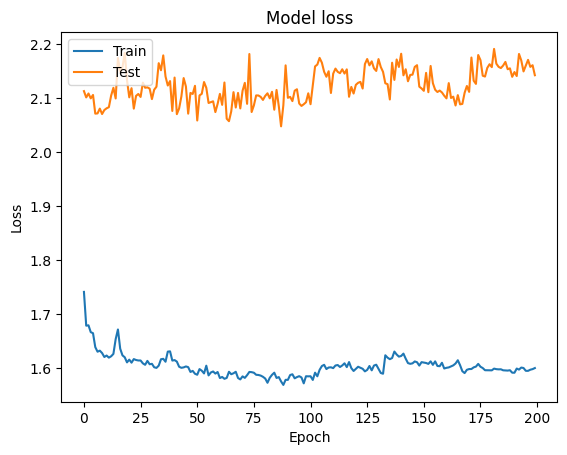

In [48]:
#学習履歴のグラフ化
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
#学習データから学習時にテストデータとして用いた部分を取り出す
Xdata_validation=Xdata[-int(len(Xdata)*(validation_split_rate)):]
Ydata_validation=Ydata[-int(len(Ydata)*(validation_split_rate)):]

55/55 [==============================] - 4s 64ms/step


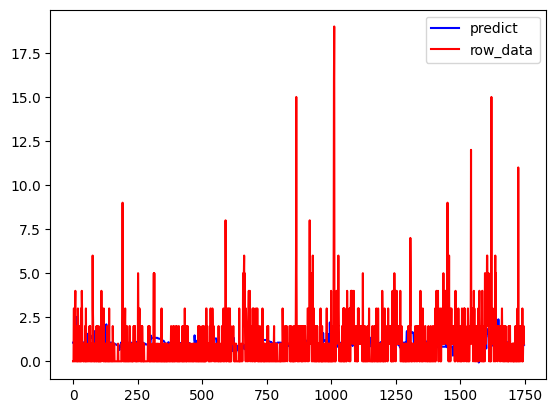

In [28]:
#テスト
Predictdata = model.predict(Xdata_validation)
#テスト結果のグラフ化
plt.plot(range(0, len(Predictdata)),Predictdata[:,0], color="b", label="predict")
plt.plot(range(0, len(Ydata_validation)),Ydata_validation[:,0], color="r", label="row_data")
plt.legend()
plt.show()

In [29]:
import pandas as pd
predict_df = pd.DataFrame(Predictdata, columns=["predict"])
validation_df = pd.DataFrame(Ydata_validation, columns=["row_data"])
predict_df.to_csv("/content/drive/MyDrive/Colab Notebooks/RENEW_predict_data05.csv", index=False)
validation_df.to_csv("/content/drive/MyDrive/Colab Notebooks/RENEW_validation_data05.csv", index=False)
